In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sbn
from collections import Counter

In [2]:
data=pd.read_csv("athlete_events.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
data.rename(columns={ "Name"   : "İsim",
                      "Sex"    : "Cinsiyet",
                      "Age"    : "Yaş",
                      "Height" : "Boy",
                      "Weight" : "Ağırlık",
                      "Team"   : "Takım",
                      "Games"  : "Oyunlar",
                      "Year"   : "Yıl",
                      "Season" : "Sezon",
                      "City"   : "Şehir",
                      "Sport"  : "Spor",
                      "Event"  : "Faliyet",
                      "Medal"  : "Madalya",     
},inplace = True)

In [5]:
data=data.drop(["ID","Oyunlar"],axis=1)

In [6]:
etkinlik=pd.unique(data.Faliyet)
print(len(etkinlik))

765


In [12]:
boy_kilo=["Boy","Ağırlık"]
veri=data.copy()
veri_etkinlik=data.copy
data_frame=data.copy()

In [8]:
for i in etkinlik:
    f_etkinlik=veri.Faliyet==i
    f_veri=veri[f_etkinlik]
    
    for j in boy_kilo:
        ortalama=np.round(np.mean(f_veri[j]),2)
        if ~np.isnan(ortalama):
             f_veri[j]=f_veri[j].fillna(ortalama)
        else:
            tam_ortalama=np.round(np.mean(data[j]),2)
            f_veri[j]=f_veri[j].fillna(tam_ortalama)
        veri[f_etkinlik]=f_veri 
    data=veri
        

C:\Users\polat\AppData\Local\Temp/ipykernel_2216/2572274432.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_veri[j]=f_veri[j].fillna(ortalama)
C:\Users\polat\AppData\Local\Temp/ipykernel_2216/2572274432.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_veri[j]=f_veri[j].fillna(tam_ortalama)


In [9]:
data

,İsim,Cinsiyet,Yaş,Boy,Ağırlık,Takım,NOC,Yıl,Sezon,Şehir,Spor,Faliyet,Madalya
0,A Dijiang,M,24.0,180.00,80.00,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.00,60.00,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,177.48,73.09,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.00,82.00,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,M,29.0,179.00,89.00,Poland-1,POL,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,Piotr ya,M,27.0,176.00,59.00,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,Piotr ya,M,27.0,176.00,59.00,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,Tomasz Ireneusz ya,M,30.0,185.00,96.00,Poland,POL,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


# Yada

In [18]:
data_frame["Ağırlık"]=data_frame.groupby("Faliyet")["Ağırlık"].apply(lambda x:x.fillna(x.mean()))
data_frame["Boy"]=data_frame.groupby("Faliyet")["Boy"].apply(lambda x:x.fillna(x.mean()))

In [19]:
data_frame

,İsim,Cinsiyet,Yaş,Boy,Ağırlık,Takım,NOC,Yıl,Sezon,Şehir,Spor,Faliyet,Madalya
0,A Dijiang,M,24.0,180.00,80.00,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.00,60.00,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,177.48,73.09,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.00,82.00,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,M,29.0,179.00,89.00,Poland-1,POL,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,Piotr ya,M,27.0,176.00,59.00,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,Piotr ya,M,27.0,176.00,59.00,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,Tomasz Ireneusz ya,M,30.0,185.00,96.00,Poland,POL,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [10]:
yas_ort=np.round(np.mean(data.Yaş),2)
data["Yaş"]=data["Yaş"].fillna(yas_ort)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   İsim      271116 non-null  object 
 1   Cinsiyet  271116 non-null  object 
 2   Yaş       271116 non-null  float64
 3   Boy       271116 non-null  float64
 4   Ağırlık   271116 non-null  float64
 5   Takım     271116 non-null  object 
 6   NOC       271116 non-null  object 
 7   Yıl       271116 non-null  int64  
 8   Sezon     271116 non-null  object 
 9   Şehir     271116 non-null  object 
 10  Spor      271116 non-null  object 
 11  Faliyet   271116 non-null  object 
 12  Madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [12]:
cl_data=data.dropna()

In [13]:
cl_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   İsim      39783 non-null  object 
 1   Cinsiyet  39783 non-null  object 
 2   Yaş       39783 non-null  float64
 3   Boy       39783 non-null  float64
 4   Ağırlık   39783 non-null  float64
 5   Takım     39783 non-null  object 
 6   NOC       39783 non-null  object 
 7   Yıl       39783 non-null  int64  
 8   Sezon     39783 non-null  object 
 9   Şehir     39783 non-null  object 
 10  Spor      39783 non-null  object 
 11  Faliyet   39783 non-null  object 
 12  Madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


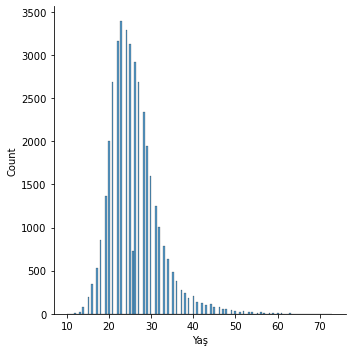

In [14]:
sbn.displot(cl_data["Yaş"])

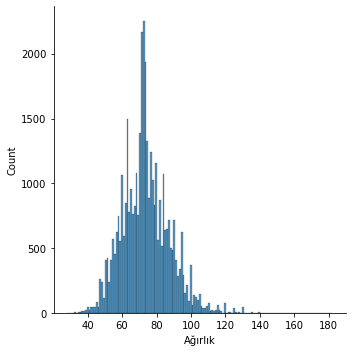

In [15]:
sbn.displot(cl_data["Ağırlık"])

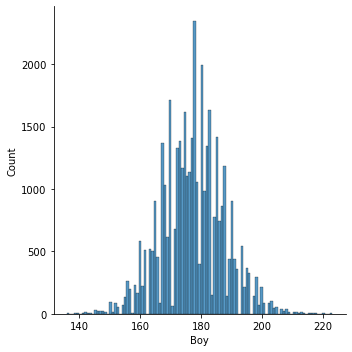

In [16]:
sbn.displot(cl_data["Boy"])

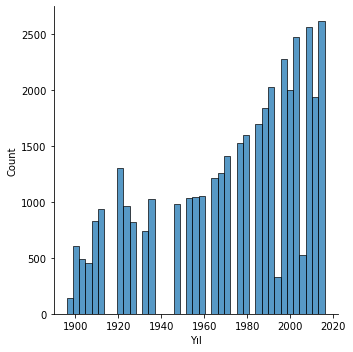

In [17]:
sbn.displot(cl_data["Yıl"])

In [18]:
erkek=cl_data[cl_data["Cinsiyet"]=="M"]
erkek

,İsim,Cinsiyet,Yaş,Boy,Ağırlık,Takım,NOC,Yıl,Sezon,Şehir,Spor,Faliyet,Madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271019,Martin Zwicker,M,29.0,175.00,64.00,Germany,GER,2016,Summer,Rio de Janeiro,Hockey,Hockey Men's Hockey,Bronze
271046,Krzysztof Zwoliski,M,21.0,175.00,70.00,Poland,POL,1980,Summer,Moskva,Athletics,Athletics Men's 4 x 100 metres Relay,Silver
271048,Henk Jan Zwolle,M,27.0,197.00,93.00,Netherlands,NED,1992,Summer,Barcelona,Rowing,Rowing Men's Double Sculls,Bronze
271049,Henk Jan Zwolle,M,31.0,197.00,93.00,Netherlands,NED,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold


In [19]:
kadın=cl_data[cl_data["Cinsiyet"]=="F"]
kadın

,İsim,Cinsiyet,Yaş,Boy,Ağırlık,Takım,NOC,Yıl,Sezon,Şehir,Spor,Faliyet,Madalya
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze
161,Patimat Abakarova,F,21.0,165.00,49.00,Azerbaijan,AZE,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
163,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.00,80.00,Russia,RUS,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271076,Galina Ivanovna Zybina (-Fyodorova),F,21.0,168.00,80.00,Soviet Union,URS,1952,Summer,Helsinki,Athletics,Athletics Women's Shot Put,Gold
271078,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.00,80.00,Soviet Union,URS,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.00,80.00,Soviet Union,URS,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271102,Olesya Nikolayevna Zykina,F,19.0,171.00,64.00,Russia,RUS,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


C:\Users\polat\AppData\Local\Temp/ipykernel_1084/97228448.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  mp.scatter(erkek.Boy,erkek.Ağırlık,alpha=0.4, label="Erkek",Color="turquoise")


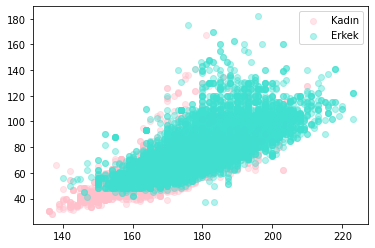

In [20]:
mp.figure()
mp.scatter(kadın.Boy,kadın.Ağırlık,alpha=0.4, label="Kadın",color="Pink")
mp.scatter(erkek.Boy,erkek.Ağırlık,alpha=0.4, label="Erkek",Color="turquoise")
mp.legend()


In [26]:
def plotBar (degisken,n=5,color="turquoise"):
    veri=cl_data[degisken]
    veri_sayma=veri.value_counts()
    veri_sayma=veri_sayma[:n]
    mp.figure()
    mp.bar(veri_sayma.index,veri_sayma,color="turquoise")
    mp.xticks(veri_sayma.index,veri_sayma.index.values)
    mp.xticks(rotation=45)
    mp.ylabel("Frekans")
    mp.title(f"Veri Sıklığı-{degisken}")
    mp.show()
   

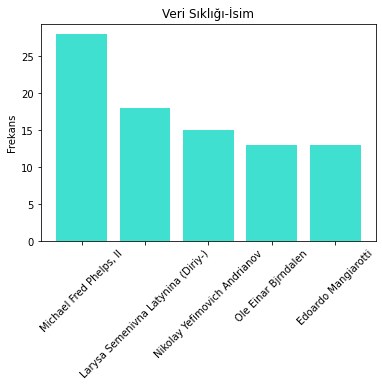

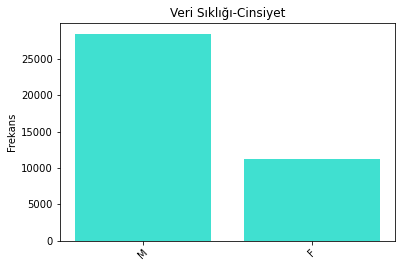

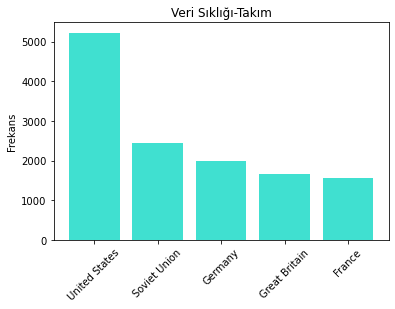

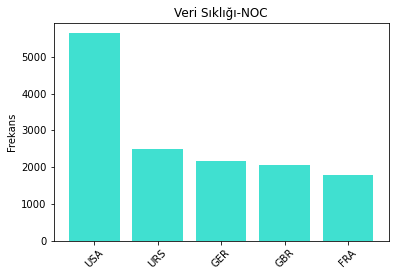

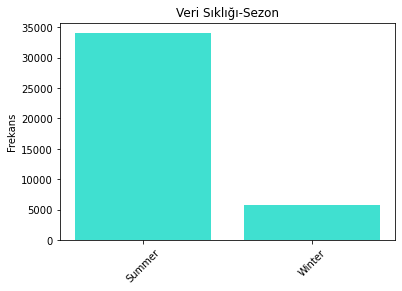

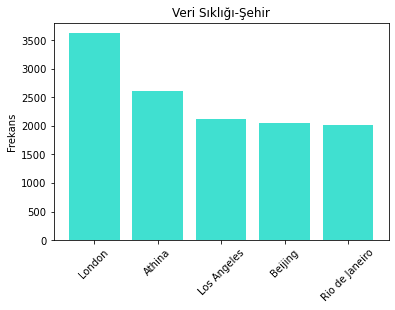

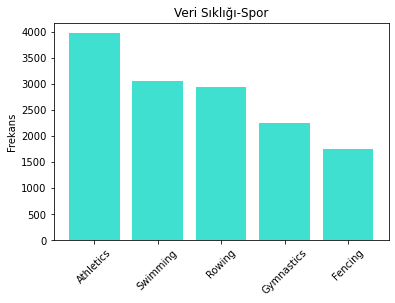

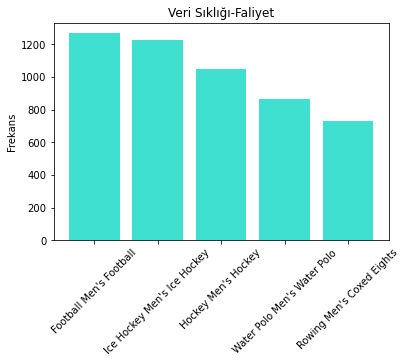

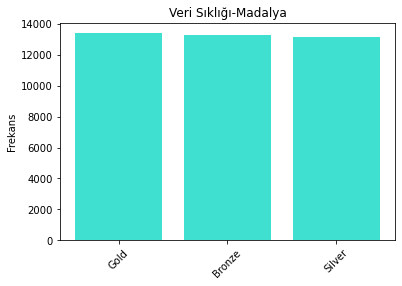

In [27]:
deg=["İsim","Cinsiyet","Takım", "NOC","Sezon","Şehir","Spor","Faliyet","Madalya"]
for i in deg:
    plotBar(i)

In [28]:
y_data=cl_data.copy()
cl_data=pd.get_dummies(cl_data,columns=["Madalya"])

In [29]:
cl_data

,İsim,Cinsiyet,Yaş,Boy,Ağırlık,Takım,NOC,Yıl,Sezon,Şehir,Spor,Faliyet,Madalya_Bronze,Madalya_Gold,Madalya_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.00,80.00,Soviet Union,URS,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,0,0,1
271080,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.00,80.00,Soviet Union,URS,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,1,0,0
271082,Bogusaw Zych,M,28.0,182.00,82.00,Poland,POL,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",1,0,0
271102,Olesya Nikolayevna Zykina,F,19.0,171.00,64.00,Russia,RUS,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,1,0,0


In [30]:
cl_data.loc[:,["Yaş","Madalya_Bronze","Madalya_Gold","Madalya_Silver"]].corr()

,Yaş,Madalya_Bronze,Madalya_Gold,Madalya_Silver
Yaş,1.000000,-0.005584,-0.002576,0.008192
Madalya_Bronze,-0.005584,1.000000,-0.504110,-0.496859
Madalya_Gold,-0.002576,-0.504110,1.000000,-0.499022
Madalya_Silver,0.008192,-0.496859,-0.499022,1.000000


In [31]:
cl_data.loc[:,["Takım","Madalya_Bronze","Madalya_Gold","Madalya_Silver"]].groupby(["Takım"],as_index=False).sum().sort_values(by="Madalya_Gold",ascending=False)

,Takım,Madalya_Bronze,Madalya_Gold,Madalya_Silver
462,United States,1233.0,2474.0,1512.0
403,Soviet Union,677.0,1058.0,716.0
165,Germany,678.0,679.0,627.0
215,Italy,484.0,535.0,508.0
171,Great Britain,572.0,519.0,582.0
...,...,...,...,...
230,Kerstin-1,3.0,0.0,0.0
226,K Division Metropolitan Police Team-3,8.0,0.0,0.0
224,Joy,0.0,0.0,2.0
220,Japan-1,0.0,0.0,2.0


In [32]:
cl_data.loc[:,["Şehir","Madalya_Bronze","Madalya_Gold","Madalya_Silver"]].groupby(["Şehir"],as_index=False).sum().sort_values(by="Madalya_Gold",ascending=False)[:10]

,Şehir,Madalya_Bronze,Madalya_Gold,Madalya_Silver
17,London,1214.0,1215.0,1195.0
3,Athina,860.0,883.0,859.0
18,Los Angeles,706.0,726.0,691.0
6,Beijing,710.0,671.0,667.0
27,Rio de Janeiro,703.0,665.0,655.0
38,Sydney,680.0,663.0,661.0
4,Atlanta,629.0,608.0,605.0
5,Barcelona,604.0,559.0,549.0
33,Seoul,549.0,520.0,513.0
2,Antwerpen,367.0,493.0,448.0


In [33]:
cl_data.loc[:,["Cinsiyet","Madalya_Bronze","Madalya_Gold","Madalya_Silver"]].groupby(["Cinsiyet"],as_index=False).sum().sort_values(by="Madalya_Gold",ascending=False)

,Cinsiyet,Madalya_Bronze,Madalya_Gold,Madalya_Silver
1,M,9524.0,9625.0,9381.0
0,F,3771.0,3747.0,3735.0


In [34]:
y2_data=y_data.copy()
p_veri=y_data.pivot_table(index="Madalya",columns="Cinsiyet",values=["Boy","Ağırlık","Yaş"],
                          aggfunc={"Boy":np.mean,"Ağırlık":np.mean,"Yaş":[min,max,np.mean,np.std]})
p_veri.head(5)

Ağırlık                    Boy               Yaş                   \
               mean                   mean               max             mean   
Cinsiyet          F          M           F           M     F     M          F   
Madalya                                                                         
Bronze    62.758422  77.856463  170.003455  180.046978  69.0  72.0  24.710549   
Gold      63.201297  78.207376  170.449103  180.320728  63.0  64.0  24.373547   
Silver    62.868179  77.979809  170.233973  180.055230  55.0  73.0  24.446683   

                                                     
                      min             std            
Cinsiyet          M     F     M         F         M  
Madalya                                              
Bronze    26.332251  12.0  10.0  5.329229  5.870340  
Gold      26.490410  13.0  13.0  5.219615  5.987807  
Silver    26.600132  11.0  13.0  5.253111  6.098221

In [35]:
def anomaliTespit (dataframe,ozellik):
    cıkıs=[]
    for k in ozellik:
        q1=np.percentile(dataframe[k],25)
        q3=np.percentile(dataframe[k],75)
        IQR=q3-q1
        adım_aralık=1.5*IQR
        cıkıs_liste=dataframe[(dataframe[k]<q1-adım_aralık) | (dataframe[k]>q3+adım_aralık)].index
        cıkıs.extend(cıkıs_liste)
     
    cıkıs= Counter(cıkıs)
    coklu_cıkıs=list(i for i, v in cıkıs.items() if v>1 )
    
    return coklu_cıkıs

In [36]:
y3_data=y2_data.copy()
anomali_data=y2_data.loc[anomaliTespit(y2_data,["Yaş","Boy","Ağırlık","Yıl"])]
anomali_data.Spor.value_counts()

Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Shooting           1
Figure Skating     1
Wrestling          1
Name: Spor, dtype: int64

In [37]:
essiz_yıl=y3_data.Yıl.unique()
essiz_yıl_sıralı=np.sort(essiz_yıl)

In [38]:
tarih_saat=pd.to_datetime(y3_data["Yıl"],format="%Y")
tarih_saat.head(3)

3    1900-01-01
37   1920-01-01
38   1920-01-01
Name: Yıl, dtype: datetime64[ns]

In [39]:
y3_data["Tarih-Saat"]=tarih_saat
y3_data=y3_data.set_index("Tarih-Saat")
y3_data.drop(["Yıl"],axis=1,inplace=True)

In [40]:
per_data=y3_data.resample("2A").mean()
per_data.dropna(inplace=True)

<Figure size 432x288 with 0 Axes>

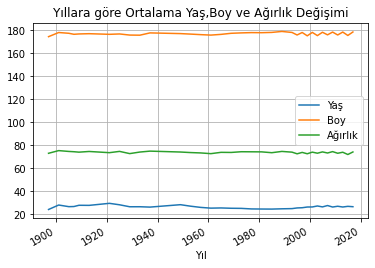

In [41]:
mp.figure()
per_data.plot()
mp.title("Yıllara göre Ortalama Yaş,Boy ve Ağırlık Değişimi")
mp.xlabel("Yıl")
mp.grid(True)
mp.show()

In [42]:
time_data=pd.get_dummies(y3_data,columns=["Madalya"])
time_data

,İsim,Cinsiyet,Yaş,Boy,Ağırlık,Takım,NOC,Sezon,Şehir,Spor,Faliyet,Madalya_Bronze,Madalya_Gold,Madalya_Silver
Tarih-Saat,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956-01-01,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.00,80.00,Soviet Union,URS,Summer,Melbourne,Athletics,Athletics Women's Shot Put,0,0,1
1964-01-01,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.00,80.00,Soviet Union,URS,Summer,Tokyo,Athletics,Athletics Women's Shot Put,1,0,0
1980-01-01,Bogusaw Zych,M,28.0,182.00,82.00,Poland,POL,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",1,0,0


In [43]:
per_data2=time_data.resample("2A").sum()

per_data2=per_data2[~(per_data2==0).any(axis=1)]


<Figure size 432x288 with 0 Axes>

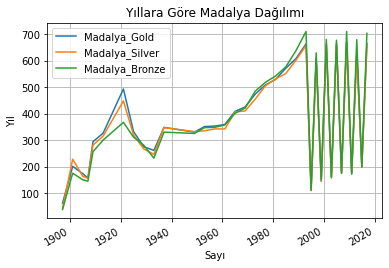

In [44]:
mp.figure()
per_data2.loc[:,["Madalya_Gold","Madalya_Silver","Madalya_Bronze"]].plot()
mp.title("Yıllara Göre Madalya Dağılımı")
mp.xlabel("Sayı")
mp.ylabel("Yıl")
mp.grid(True)


In [45]:
yaz=time_data[time_data.Sezon=="Summer"]
kıs=time_data[time_data.Sezon=="Winter"]


In [46]:
per_yaz=yaz.resample("A").sum()

per_yaz=per_yaz[~(per_yaz==0).any(axis=1)]


In [47]:
per_kıs=kıs.resample("A").sum()
per_kıs=per_kıs[~(per_kıs==0).any(axis=1)]

<Figure size 432x288 with 0 Axes>

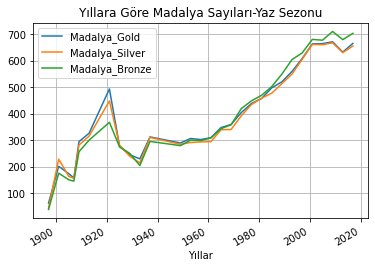

In [48]:
mp.figure()
per_yaz.loc[:,["Madalya_Gold","Madalya_Silver","Madalya_Bronze"]].plot()
mp.title("Yıllara Göre Madalya Sayıları-Yaz Sezonu")
mp.xlabel("Yıllar")
mp.grid(True)


<Figure size 432x288 with 0 Axes>

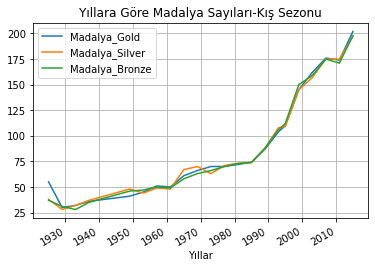

In [49]:
mp.figure()
per_kıs.loc[:,["Madalya_Gold","Madalya_Silver","Madalya_Bronze"]].plot()
mp.title("Yıllara Göre Madalya Sayıları-Kış Sezonu")
mp.xlabel("Yıllar")
mp.grid(True)